# MySQL Installation

In [ ]:
! sudo apt install mysql-server

In [ ]:
! service mysql status

In [ ]:
! /etc/init.d/mysql start

In [ ]:
! mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY '8OQsfBWBP4'; FLUSH PRIVILEGES;"

In [ ]:
!mysql -u root -p8OQsfBWBP4 -e "CREATE USER 'test_user'@'localhost' IDENTIFIED BY 'test_p@ssw0rd';"
!mysql -u root -p8OQsfBWBP4 -e "GRANT ALL PRIVILEGES ON *.* TO 'test_user'@'localhost';"
!mysql -u root -p8OQsfBWBP4 -e "FLUSH PRIVILEGES;"

In [ ]:
!pip install mysql-connector-python

## MongoDB Installation

In [ ]:
! cat /etc/lsb-release

In [ ]:
! curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg \
   --dearmor

In [ ]:
! echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list

In [ ]:
! sudo apt-get update

In [ ]:
! sudo apt-get install -y mongodb-org


In [ ]:
!mkdir -p /data/db
!sudo chown -R mongodb:mongodb /data/db

In [ ]:
!mongod --dbpath /data/db --bind_ip 127.0.0.1 --logpath /data/db/mongod.log --fork

In [ ]:
!tail /data/db/mongod.log

In [ ]:
!pip install pymongo

## app.py

In python virtual environment, enter python prompt:
```
python
```
Then, run the following python code.

In [ ]:
s='''import mysql.connector
from flask import Flask, request, jsonify
from pymongo import MongoClient
from datetime import datetime

app = Flask(__name__)



mongo_client = MongoClient('mongodb://localhost:27017/')
mongo_db = mongo_client['weather_forecast']  # Replace with your database name
mongo_collection = mongo_db['weather_data']

# Database configurations
mysql_config = {
    'user': 'test_user',
    'password': 'test_p@ssw0rd',
    'host': '127.0.0.1'
}

# Create MySQL table
mydb = mysql.connector.connect(**mysql_config)
mycursor = mydb.cursor()
mycursor.execute("CREATE DATABASE IF NOT EXISTS weather_forecast")
mycursor.close()
mydb.close()

mysql_config = {
    'user': 'test_user',
    'password': 'test_p@ssw0rd',
    'host': '127.0.0.1',
    'database': 'weather_forecast'  # Replace with your database name
}
mydb = mysql.connector.connect(**mysql_config)
mycursor = mydb.cursor()
mycursor.execute("CREATE TABLE IF NOT EXISTS weather_data (time VARCHAR(12), temp2m FLOAT, precipitation FLOAT)")
mydb.commit()
mycursor.close()
mydb.close()

@app.route('/')
def hello_world():
    return 'I am running!'

@app.route('/weather', methods=['POST'])
def insert_weather_data():
    data = request.get_json()
    mydb = mysql.connector.connect(**mysql_config)
    mycursor = mydb.cursor()
    for item in data:
        time = item['time']
        temp2m = item['temp2m']
        precipitation = item['precipitation']
        sql = "INSERT INTO weather_data (time, temp2m, precipitation) VALUES (%s, %s, %s)"
        val = (time, temp2m, precipitation)
        mycursor.execute(sql, val)
        mongo_collection.insert_one(item)
    mydb.commit()
    mycursor.close()
    mydb.close()
    return jsonify({'message': 'Data inserted successfully'}), 201

@app.route('/weather/<datetime_str>/<dbname>', methods=['GET'])
def get_weather_data(datetime_str, dbname):

    try:
      dt = datetime.strptime(datetime_str, "%Y-%m-%d-%H")
    except:
      return jsonify({"error":"datetime format error"}), 400


    if dbname.lower() == "mongodb":
        data = mongo_collection.find_one({"time":datetime_str})
        return jsonify(data) if data else jsonify({"message": "No data found"}), 200
    elif dbname.lower() == "mysql":
        mydb = mysql.connector.connect(**mysql_config)
        mycursor = mydb.cursor(dictionary=True)

        mycursor.execute(f"SELECT * FROM weather_data WHERE time = '{datetime_str}'")
        data = mycursor.fetchall()

        mycursor.close()
        mydb.close()
        return jsonify(data) if data else jsonify({"message": "No data found"}), 200
    else:
        return jsonify({"error": "Invalid dbname"}), 400

@app.route('/weather/all/<dbname>', methods=['GET'])
def get_all_weather_data(dbname):
    if dbname.lower() == "mongodb":
        data = list(mongo_collection.find({}, {"_id": 0}))  # Exclude _id for clean JSON
        return jsonify(data) if data else jsonify({"message": "No data found"}), 200
    elif dbname.lower() == "mysql":
        mydb = mysql.connector.connect(**mysql_config)
        mycursor = mydb.cursor(dictionary=True)

        mycursor.execute("SELECT * FROM weather_data")
        data = mycursor.fetchall()

        mycursor.close()
        mydb.close()
        return jsonify(data) if data else jsonify({"message": "No data found"}), 200
    else:
        return jsonify({"error": "Invalid dbname"}), 400

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
'''
with open('app.py','w') as f:
  f.write(s)

Exit python prompt.
Run flask as a background process and observe the process ID.

*   `nohup` to ignore the hang-up signal
*   `> output.log` to redirect standard output to `output.log`
*   `2>&1` to redirect stderror to same location as standard output
*   `&` to run in the background





In [ ]:
!nohup python3 app.py > output.log 2>&1 &

Use `ps aux` to give process status (ps) of all (a) running processes in user-oriented format (u), including background processes not attached to a terminal (x).

In [ ]:
!ps aux | grep app.py

In [ ]:
!ps -u root

    PID TTY          TIME CMD
      1 ?        00:00:00 docker-init
      7 ?        00:00:05 node
     19 ?        00:00:00 oom_monitor.sh
     21 ?        00:00:00 run.sh
     24 ?        00:00:01 kernel_manager_
     27 ?        00:00:00 tail
     33 ?        00:00:00 tail
     71 ?        00:00:20 python3 <defunct>
     72 ?        00:00:01 colab-fileshim.
     92 ?        00:00:06 jupyter-noteboo
     93 ?        00:00:01 dap_multiplexer
    293 ?        00:00:13 python3
    325 ?        00:00:04 python3
   2521 ?        00:00:10 mongod
   2628 ?        00:00:00 language_servic
   2635 ?        00:00:43 node
   7735 ?        00:00:00 python3
   7745 ?        00:00:00 python3
   7763 ?        00:00:00 sleep
   7764 ?        00:00:00 ps


Check IP address of the VM.

In [ ]:
! ip a

In python prompt of the python virtual environment, create a python code to connect to Flask endpoint at its own IP address.
*   Change the IP address to the VM's IP address

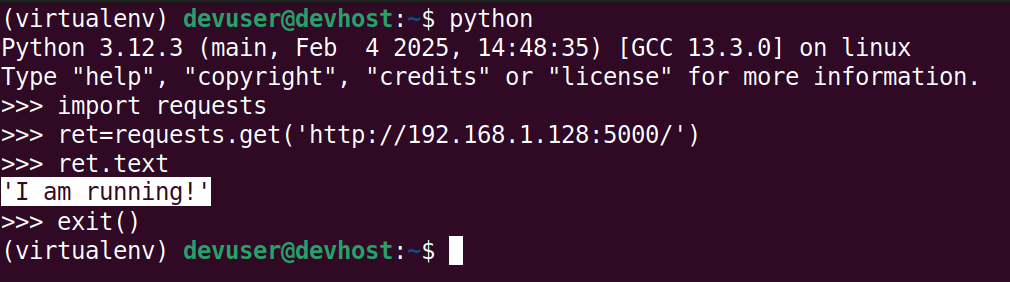

In [ ]:
import requests

ret=requests.get('http://172.20.10.3:5000/')

In [ ]:
ret.text

### Insert data

### Clear all databases
In python virtual environment, enter python prompt:
```
python
```



Use the following code to clear the database.

In [ ]:
from pymongo import MongoClient
import mysql.connector

mongo_client = MongoClient('mongodb://localhost:27017/')
mongo_db = mongo_client['weather_forecast']  # Replace with your database name
mongo_collection = mongo_db['weather_data']
mongo_collection.delete_many({})

mysql_config = {
    'user': 'test_user',
    'password': 'test_p@ssw0rd',
    'host': '127.0.0.1',
    'database': 'weather_forecast'
}

# Create MySQL table
mydb = mysql.connector.connect(**mysql_config)
mycursor = mydb.cursor()
mycursor.execute("DROP TABLE IF EXISTS weather_data;")
mycursor.execute("CREATE TABLE IF NOT EXISTS weather_data (time VARCHAR(13), temp2m FLOAT, precipitation FLOAT)")
mydb.commit()
mycursor.close()
mydb.close()

Exit the python prompt:
```
exit()
```
Then, check database with the following command.


In [ ]:
! mysql -u test_user -ptest_p@ssw0rd weather_forecast -e 'SHOW PROCESSLIST;'

mysql: [Warning] Using a password on the command line interface can be insecure.
+----+-----------------+-----------+------------------+---------+------+------------------------+------------------+
| Id | User            | Host      | db               | Command | Time | State                  | Info             |
+----+-----------------+-----------+------------------+---------+------+------------------------+------------------+
|  5 | event_scheduler | localhost | NULL             | Daemon  | 1508 | Waiting on empty queue | NULL             |
| 47 | test_user       | localhost | weather_forecast | Query   |    0 | init                   | SHOW PROCESSLIST |
+----+-----------------+-----------+------------------+---------+------+------------------------+------------------+


In [ ]:
! mysql -u test_user -ptest_p@ssw0rd weather_forecast -e 'SELECT * FROM weather_data  WHERE time="2025-02-24-21";'

mysql: [Warning] Using a password on the command line interface can be insecure.


In python virtual environment, enter python prompt:
```
python
```

Run the following code to insert weather data.

In [ ]:
import requests
import json
from datetime import datetime

# Define the Flask API endpoint (Replace with your actual Flask server address)
FLASK_URL = "http://172.20.10.3:5000/weather"  # Change this if using ngrok or a remote server

# Example weather data to send
weather_data = [
    {
        "time": datetime.strftime(datetime.now(),'2025-02-24-21'),
        "temp2m": 25.6,
        "precipitation": 0.2
    },
    {
        "time": datetime.strftime(datetime.now(),'2025-02-24-22'),
        "temp2m": 26.1,
        "precipitation": 0.0
    }
]

# Send POST request with JSON data
headers = {"Content-Type": "application/json"}
response = requests.post(FLASK_URL, data=json.dumps(weather_data), headers=headers)

# Print the response from the server
print(response.status_code, response.json())


201 {'message': 'Data inserted successfully'}


Run the following code to call Flask API endpoint to query the data.

In [ ]:
import requests

dbname = "mongodb"  # Change to "mysql" if needed
url = f"http://172.20.10.3:5000/weather/all/{dbname}"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("Weather Data:")
    for entry in data:
        print(entry)
else:
    print(f"Error: {response.json()}")


Weather Data:
{'precipitation': 0.2, 'temp2m': 25.6, 'time': '2025-02-24-21'}
{'precipitation': 0.0, 'temp2m': 26.1, 'time': '2025-02-24-22'}


Run the following code to call Flask API endpoint with path parameter to query the data.

In [ ]:
import requests

dbname = "mysql"  # Change to "mysql" if needed
url = f"http://172.20.10.3:5000/weather/2025-02-24-21/{dbname}"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("Weather Data:")
    for entry in data:
        print(entry)
else:
    print(f"Error: {response.json()}")


Weather Data:
{'precipitation': 0.2, 'temp2m': 25.6, 'time': '2025-02-24-21'}


Use `kill -9 PID` to forcefully (-9) terminate the process of given PID

In [ ]:
! sudo kill -9 4334